In [282]:
# Load the data from the URL
import pandas as pd
url = "https://vincentarelbundock.github.io/Rdatasets/csv/carData/Salaries.csv"
data = pd.read_csv(url)

data.head()

,rownames,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,1,Prof,B,19,18,Male,139750
1,2,Prof,B,20,16,Male,173200
2,3,AsstProf,B,4,3,Male,79750
3,4,Prof,B,45,39,Male,115000
4,5,Prof,B,40,41,Male,141500


In [283]:
data['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [284]:
data.isnull().sum()

rownames         0
rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

it seems that there are no NULL values in our data set

In [285]:
data.describe()

,rownames,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000,397.000000
mean,199.000000,22.314861,17.614610,113706.458438
std,114.748275,12.887003,13.006024,30289.038695
min,1.000000,1.000000,0.000000,57800.000000
25%,100.000000,12.000000,7.000000,91000.000000
50%,199.000000,21.000000,16.000000,107300.000000
75%,298.000000,32.000000,27.000000,134185.000000
max,397.000000,56.000000,60.000000,231545.000000


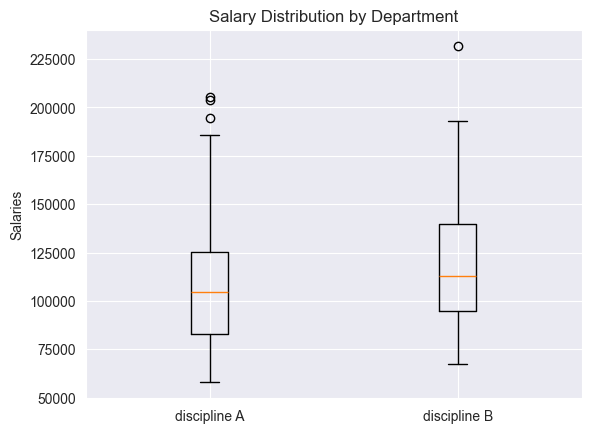

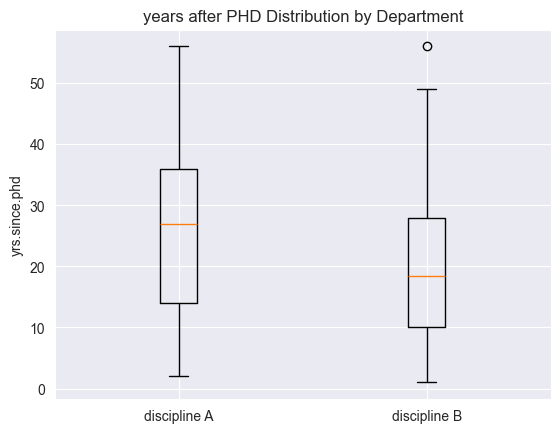

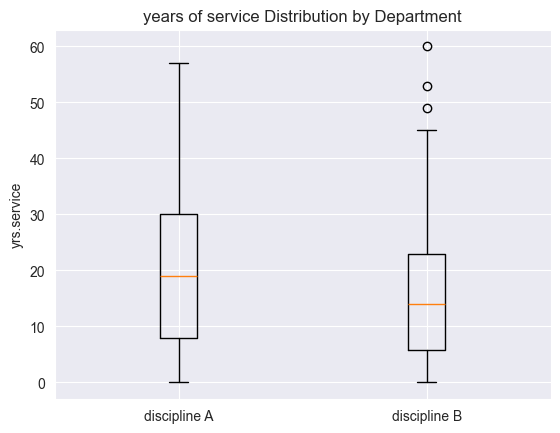

In [286]:
import matplotlib.pyplot as plt
#differences based on discipline
discipline_A_salary = data[data['discipline'] == 'A']['salary']
discipline_B_salary = data[data['discipline'] == 'B']['salary']
plt.boxplot([discipline_A_salary, discipline_B_salary], tick_labels=['discipline A', 'discipline B'])
plt.title('Salary Distribution by Department')
plt.ylabel('Salaries')
plt.show()

discipline_A_yrs_after_phd = data[data['discipline'] == 'A']['yrs.since.phd']
discipline_B_yrs_after_phd = data[data['discipline'] == 'B']['yrs.since.phd']
plt.boxplot([discipline_A_yrs_after_phd, discipline_B_yrs_after_phd], tick_labels=['discipline A', 'discipline B'])
plt.title('years after PHD Distribution by Department')
plt.ylabel('yrs.since.phd')
plt.show()

discipline_A_yrs_service = data[data['discipline'] == 'A']['yrs.service']
discipline_B_yrs_service = data[data['discipline'] == 'B']['yrs.service']
plt.boxplot([discipline_A_yrs_service, discipline_B_yrs_service], tick_labels=['discipline A', 'discipline B'])
plt.title('years of service Distribution by Department')
plt.ylabel('yrs.service')
plt.show()

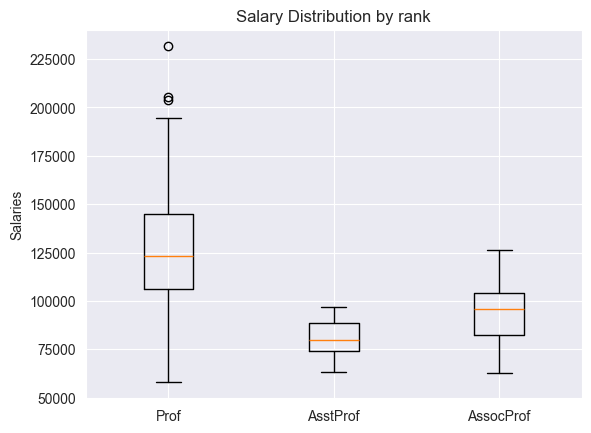

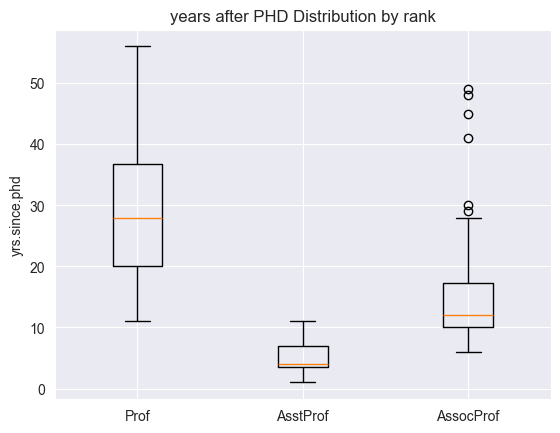

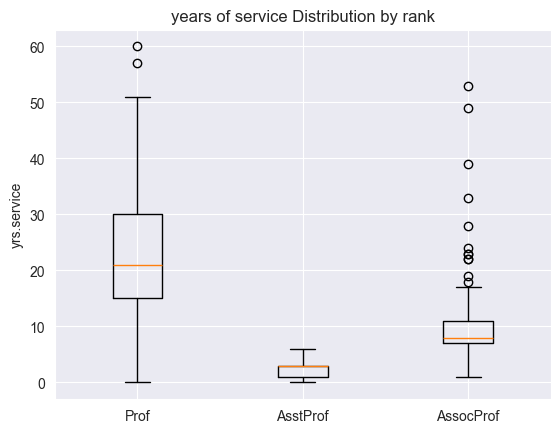

In [287]:
#differences based on rank

prof_salary = data[data['rank'] == 'Prof']['salary']
asst_salary = data[data['rank'] == 'AsstProf']['salary']
assoc_salary = data[data['rank'] == 'AssocProf']['salary']
plt.boxplot([prof_salary, asst_salary, assoc_salary], tick_labels=['Prof', 'AsstProf', 'AssocProf'])
plt.title('Salary Distribution by rank')
plt.ylabel('Salaries')
plt.show()

prof_since_phd = data[data['rank'] == 'Prof']['yrs.since.phd']
asst_since_phd = data[data['rank'] == 'AsstProf']['yrs.since.phd']
assoc_since_phd = data[data['rank'] == 'AssocProf']['yrs.since.phd']
plt.boxplot([prof_since_phd, asst_since_phd, assoc_since_phd], tick_labels=['Prof', 'AsstProf', 'AssocProf'])
plt.title('years after PHD Distribution by rank')
plt.ylabel('yrs.since.phd')
plt.show()

prof_service = data[data['rank'] == 'Prof']['yrs.service']
asst_service = data[data['rank'] == 'AsstProf']['yrs.service']
assoc_service = data[data['rank'] == 'AssocProf']['yrs.service']
plt.boxplot([prof_service, asst_service, assoc_service], tick_labels=['Prof', 'AsstProf', 'AssocProf'])
plt.title('years of service Distribution by rank')
plt.ylabel('yrs.service')
plt.show()

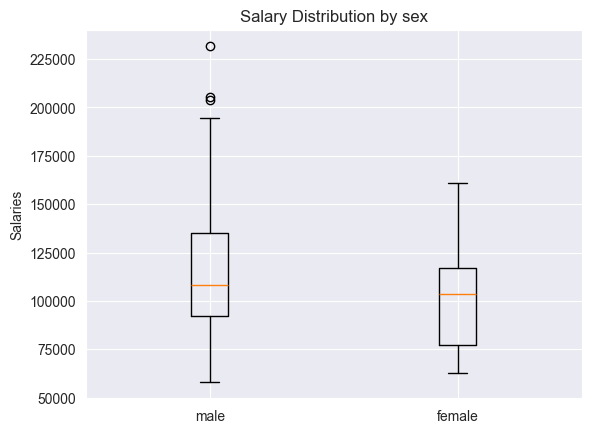

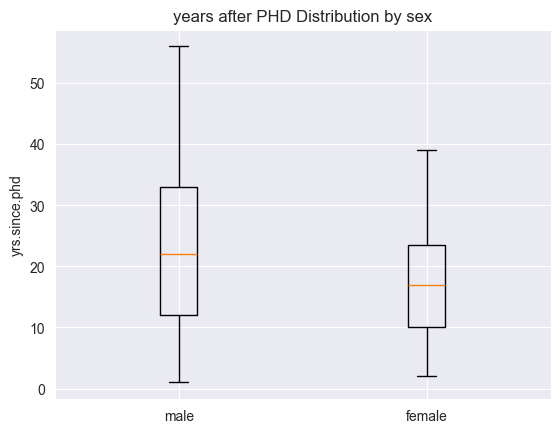

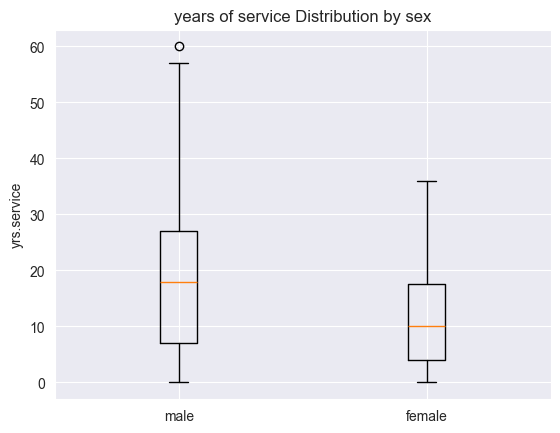

In [288]:
import matplotlib.pyplot as plt
#differences based on discipline
male_salary = data[data['sex'] == 'Male']['salary']
female_salary = data[data['sex'] == 'Female']['salary']
plt.boxplot([male_salary, female_salary], tick_labels=['male', 'female'])
plt.title('Salary Distribution by sex')
plt.ylabel('Salaries')
plt.show()

male_yrs_after_phd = data[data['sex'] == 'Male']['yrs.since.phd']
female_yrs_after_phd = data[data['sex'] == 'Female']['yrs.since.phd']
plt.boxplot([male_yrs_after_phd, female_yrs_after_phd], tick_labels=['male', 'female'])
plt.title('years after PHD Distribution by sex')
plt.ylabel('yrs.since.phd')
plt.show()

male_yrs_service = data[data['sex'] == 'Male']['yrs.service']
female_yrs_service = data[data['sex'] == 'Female']['yrs.service']
plt.boxplot([male_yrs_service, female_yrs_service], tick_labels=['male', 'female'])
plt.title('years of service Distribution by sex')
plt.ylabel('yrs.service')
plt.show()

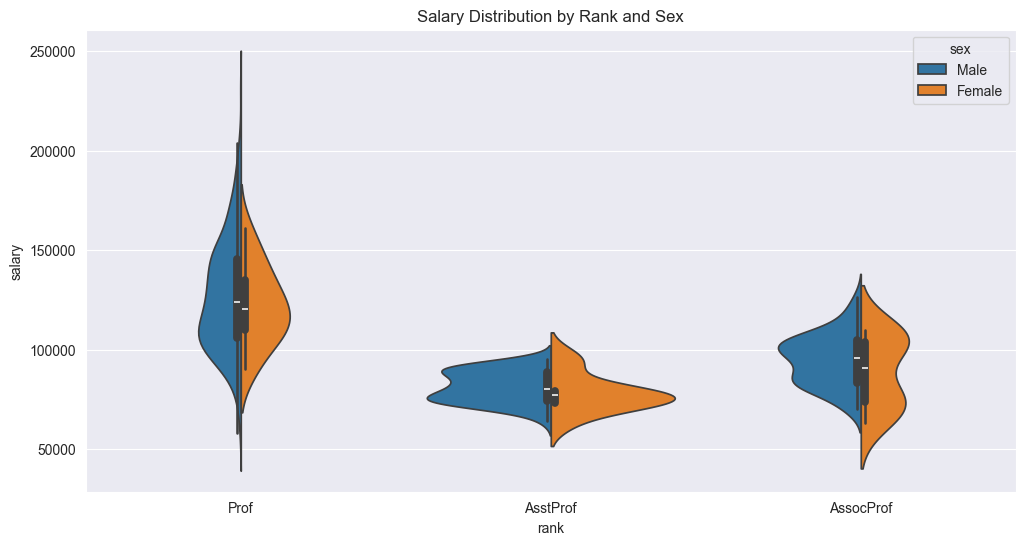

In [289]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.violinplot(x='rank', y='salary', hue='sex', data=data, split=True)
plt.title('Salary Distribution by Rank and Sex')
plt.show()


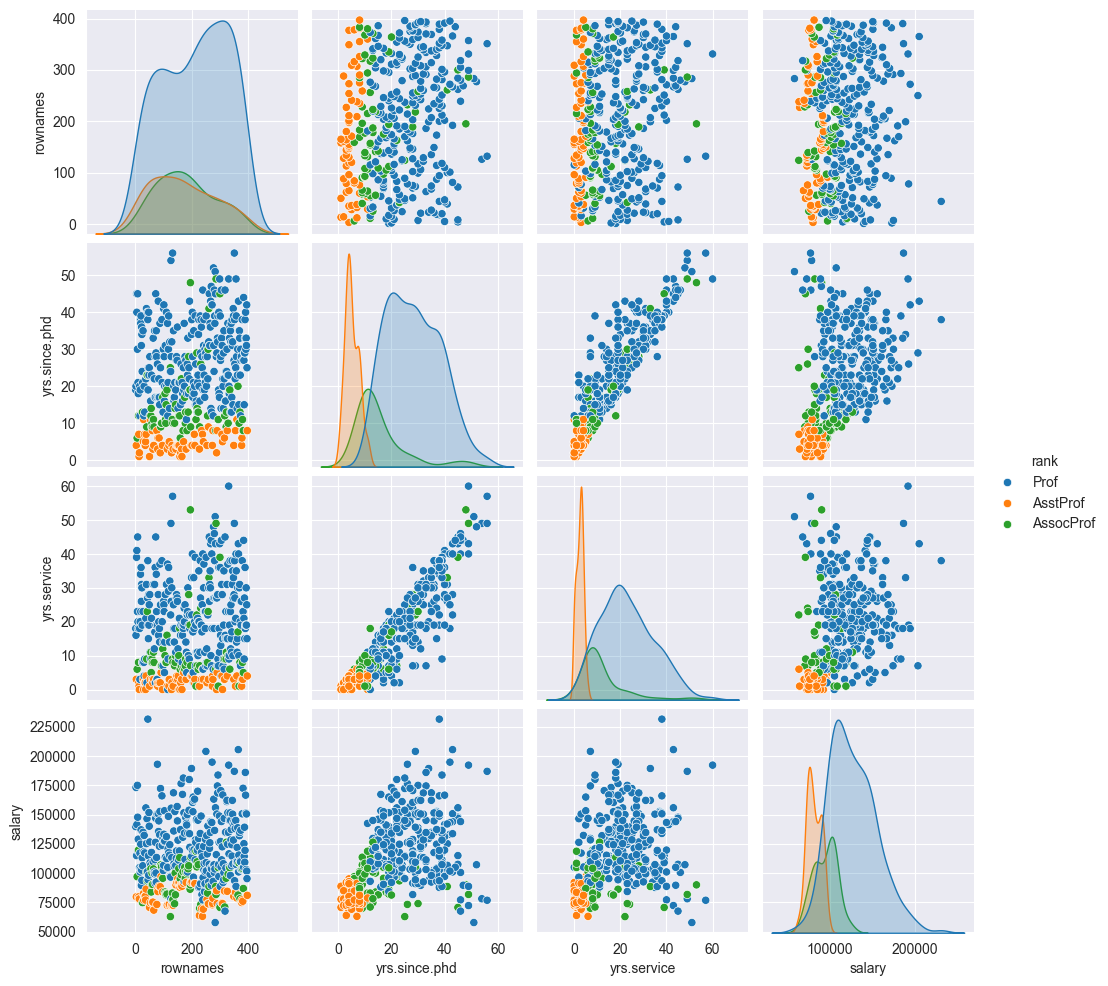

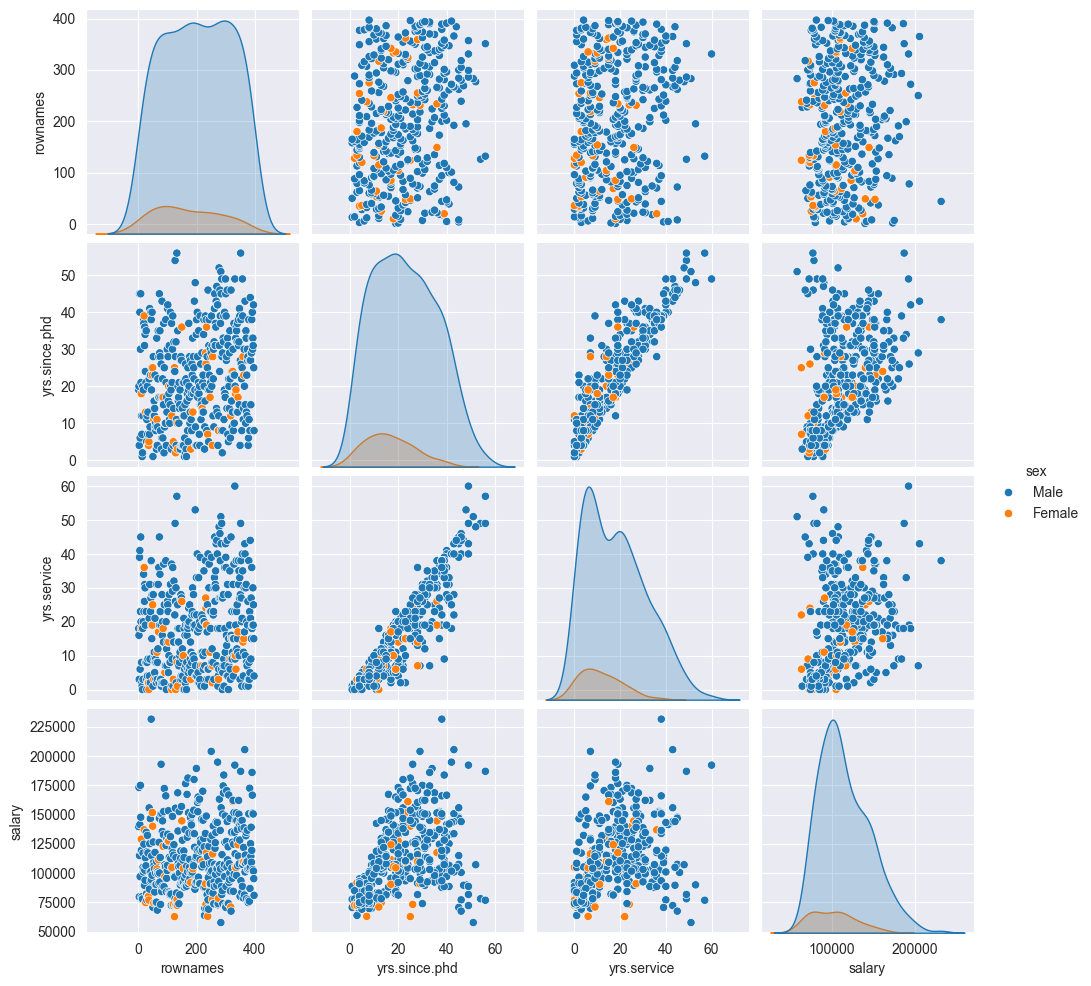

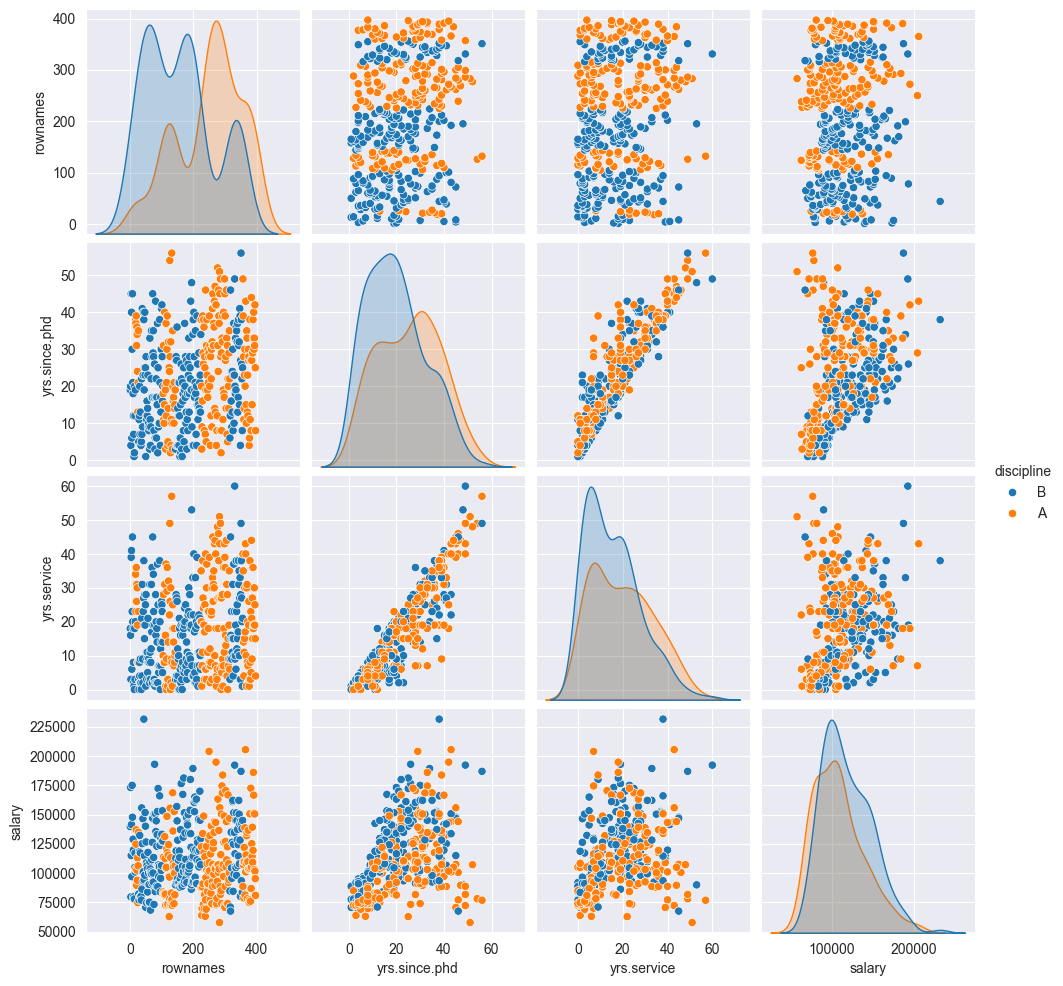

In [290]:
sns.pairplot(data, hue="rank", diag_kind="kde")
plt.show()

sns.pairplot(data, hue="sex", diag_kind="kde")
plt.show()

sns.pairplot(data, hue="discipline", diag_kind="kde")
plt.show()


Next step: prepare data, check MANOVA assumptions

In [291]:
import pingouin

groups_rank = data['rank'].unique()
for group in groups_rank:
    group_data_rank = data[data['rank'] == group][['yrs.since.phd','yrs.service', 'salary']]
    
    stat, p_value, is_normal = pingouin.multivariate_normality(group_data_rank, alpha=0.05)
    print("Multivariate normality check: ")
    print(f"is normal? {is_normal}, p-value: {p_value}")
    print(f"test statistic: {stat},")
    
    for col in group_data_rank.columns:
        normality = pingouin.normality(
            data=group_data_rank[col],
            method='shapiro',
            alpha=0.05) 
        print(normality)

Multivariate normality check: 
is normal? False, p-value: 1.3567199760866667e-224
test statistic: 211.77153643693032,
                      W     pval  normal
yrs.since.phd  0.970895  0.00003   False
                   W      pval  normal
yrs.service  0.97846  0.000471   False
               W      pval  normal
salary  0.975968  0.000183   False
Multivariate normality check: 
is normal? False, p-value: 3.2982801723342657e-90
test statistic: 46.73512142177496,
                      W      pval  normal
yrs.since.phd  0.936198  0.001925   False
                    W      pval  normal
yrs.service  0.933515  0.001443   False
               W      pval  normal
salary  0.959954  0.030058   False
Multivariate normality check: 
is normal? False, p-value: 2.2243269197071705e-87
test statistic: 44.40609057116915,
                      W          pval  normal
yrs.since.phd  0.726888  1.351820e-09   False
                   W          pval  normal
yrs.service  0.69139  2.598757e-10   False
        

it seems that based on rank data is not normally distributed

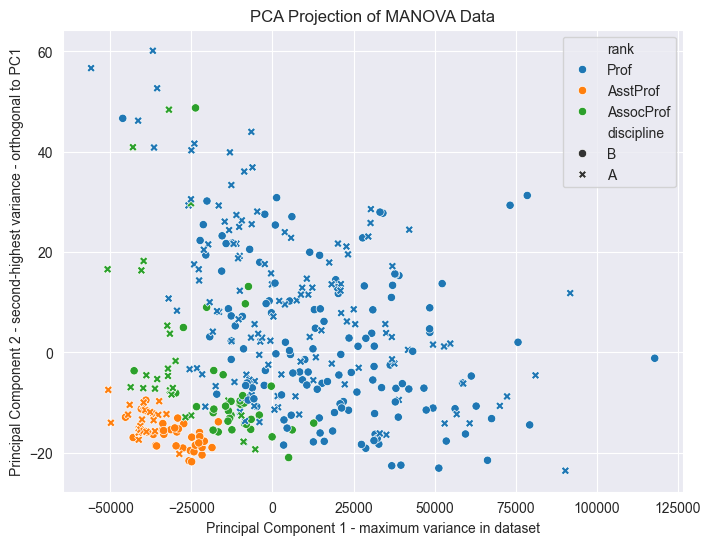

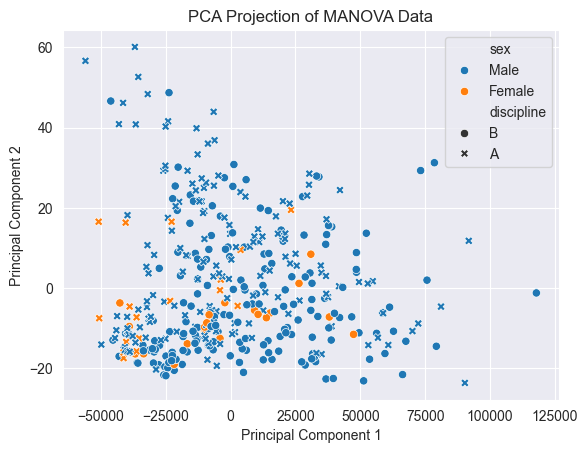

In [292]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
X = data[['salary', 'yrs.since.phd', 'yrs.service']]
X_pca = pca.fit_transform(X)
filtered_data = data.loc[X.index]
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['rank'], style=filtered_data['discipline'])
plt.title("PCA Projection of MANOVA Data")
plt.xlabel("Principal Component 1 - maximum variance in dataset")
plt.ylabel("Principal Component 2 - second-highest variance - orthogonal to PC1")
plt.show()

sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=filtered_data['sex'], style=filtered_data['discipline'])
plt.title("PCA Projection of MANOVA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [293]:
groups_discipline = data['discipline'].unique()
for group in groups_discipline:
    group_data_disc = data[data['discipline'] == group][['yrs.since.phd','yrs.service', 'salary']]
    for col in group_data_disc.columns:
        normality = pingouin.normality(
            data=group_data_disc[col],
            method='shapiro',
            alpha=0.05) 
        print(normality)

                      W      pval  normal
yrs.since.phd  0.961337  0.000013   False
                    W          pval  normal
yrs.service  0.928474  9.358280e-09   False
               W      pval  normal
salary  0.961194  0.000013   False
                      W      pval  normal
yrs.since.phd  0.974107  0.001895   False
                    W      pval  normal
yrs.service  0.953603  0.000012   False
              W      pval  normal
salary  0.94183  0.000001   False


also based on discipline there is no normally distributed data

In [294]:
groups_sex = data['sex'].unique()

for group in groups_sex:
    group_data_sex = data[data['sex'] == group][['yrs.since.phd','yrs.service', 'salary']]
    
    for col in group_data_sex.columns:
        normality = pingouin.normality(
            data=group_data_sex[col],
            method='shapiro',
            alpha=0.05) 
        print(normality)

                      W      pval  normal
yrs.since.phd  0.971164  0.000002   False
                   W          pval  normal
yrs.service  0.94542  3.209734e-10   False
               W          pval  normal
salary  0.958767  1.734667e-08   False
                      W      pval  normal
yrs.since.phd  0.956547  0.136608    True
                    W      pval  normal
yrs.service  0.942484  0.046007   False
               W      pval  normal
salary  0.946648  0.063389    True


and based on sex data is not normal, we need to deal with this somehow

In [295]:
from scipy import stats

for group in groups_rank:
    group_data_rank = data[data['rank'] == group][['yrs.since.phd','yrs.service', 'salary']]
    for col in group_data_rank.columns:
        normal_rank, lambda_val = stats.yeojohnson(group_data_rank[col])
        normality = pingouin.normality(
            data=normal_rank,
            method='shapiro',
            alpha=0.05) 
        print(normality)

          W      pval  normal
0  0.980242  0.000948   False
          W      pval  normal
0  0.994022  0.375887    True
          W      pval  normal
0  0.994427  0.439429    True
          W      pval  normal
0  0.955932  0.018418   False
          W     pval  normal
0  0.929744  0.00097   False
          W      pval  normal
0  0.961746  0.037485   False
          W      pval  normal
0  0.969978  0.120653    True
          W     pval  normal
0  0.883258  0.00002   False
          W      pval  normal
0  0.975714  0.237916    True


In [296]:
from scipy import stats

for group in groups_sex:
    group_data_sex = data[data['sex'] == group][['yrs.since.phd','yrs.service', 'salary']]
    for col in group_data_sex.columns:
        normal_rank, lambda_val = stats.yeojohnson(group_data_sex[col])
        normality = pingouin.normality(
            data=normal_rank,
            method='shapiro',
            alpha=0.05) 
        print(normality)

          W      pval  normal
0  0.978106  0.000029   False
          W      pval  normal
0  0.975957  0.000011   False
          W      pval  normal
0  0.991611  0.040354   False
          W      pval  normal
0  0.973479  0.476782    True
         W      pval  normal
0  0.97452  0.510325    True
          W      pval  normal
0  0.955762  0.128541    True


In [297]:
from scipy import stats

for group in groups_discipline:
    group_data_disc = data[data['discipline'] == group][['yrs.since.phd','yrs.service', 'salary']]
    for col in group_data_disc.columns:
        normal_rank, lambda_val = stats.yeojohnson(group_data_disc[col])
        normality = pingouin.normality(
            data=normal_rank,
            method='shapiro',
            alpha=0.05) 
        print(normality)

          W     pval  normal
0  0.982673  0.00942   False
          W      pval  normal
0  0.979626  0.003237   False
          W      pval  normal
0  0.989141  0.102166    True
          W      pval  normal
0  0.973404  0.001556   False
          W      pval  normal
0  0.971332  0.000879   False
          W      pval  normal
0  0.985086  0.051302    True


Since transformation didn't change normality of data, i will perform MANOVA alternatives: PERMANOVA and MANOVA based on ranks

In [298]:
from sklearn.metrics import pairwise_distances
from skbio.stats.distance import DistanceMatrix, permanova
columns = ['yrs.since.phd', 'yrs.service', 'salary']
data_for_analysis_rank = data[columns]

dist_matrix_array = pairwise_distances(data_for_analysis_rank, metric='euclidean')
# Use the DataFrame index (converted to strings) as the IDs for the DistanceMatrix.
ids = data.index.astype(str).tolist()
dist_matrix = DistanceMatrix(dist_matrix_array, ids=ids)
grouping_rank = data['rank']
grouping_rank.index = grouping_rank.index.astype(str)
result = permanova(dist_matrix, grouping_rank, permutations=999)
print(result)

method name                PERMANOVA
test statistic name         pseudo-F
sample size                      397
number of groups                   3
test statistic            128.217401
p-value                        0.001
number of permutations           999
Name: PERMANOVA results, dtype: object


In [299]:
from scipy.stats import rankdata
from statsmodels.multivariate.manova import MANOVA

ranked_df = data.copy()
ranked_df = ranked_df.rename(columns={
    'yrs.since.phd': 'yrs_since_phd',
    'yrs.service': 'yrs_service'
})
for col in ['yrs_since_phd', 'yrs_service', 'salary']:
    ranked_df[col] = rankdata(ranked_df[col])

manova_model = MANOVA.from_formula('yrs_since_phd + yrs_service + salary ~ rank', data=ranked_df)
print(manova_model.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4902 3.0000 392.0000 135.8799 0.0000
         Pillai's trace 0.5098 3.0000 392.0000 135.8799 0.0000
 Hotelling-Lawley trace 1.0399 3.0000 392.0000 135.8799 0.0000
    Roy's greatest root 1.0399 3.0000 392.0000 135.8799 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          rank          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.2848 6.0000 784.0000 114.1764 0.0000
         Pillai's trace 0.7292 6.0000 786.0000  75.1682 0.0000
 Hotelling-

Based on PERMANOVA where pseudo-F-statistic = 128.217401 and p-value = 0.001 and MANOVA performed on rank where p-values in each test is less than 0.0000 something, there is a statistically significant difference in the multivariate responses( years since phd, years of service and salary) across the ranks

In [300]:
grouping_sex = data['sex']
grouping_sex.index = grouping_sex.index.astype(str)
result = permanova(dist_matrix, grouping_sex, permutations=999)
print(result)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     397
number of groups                  2
test statistic             7.737711
p-value                       0.007
number of permutations          999
Name: PERMANOVA results, dtype: object


In [301]:
manova_model = MANOVA.from_formula('yrs_since_phd + yrs_service + salary ~ sex', data=ranked_df)
print(manova_model.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.8039 3.0000 393.0000 31.9599 0.0000
         Pillai's trace 0.1961 3.0000 393.0000 31.9599 0.0000
 Hotelling-Lawley trace 0.2440 3.0000 393.0000 31.9599 0.0000
    Roy's greatest root 0.2440 3.0000 393.0000 31.9599 0.0000
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
          sex           Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9715 3.0000 393.0000  3.8402 0.0099
         Pillai's trace 0.0285 3.0000 393.0000  3.8402 0.0099
 Hotelling-Lawley trace 0.

Based on PERMANOVA where pseudo-F-statistic = 7.737711 and p-value = 0.008 and MANOVA performed on rank where p-values in each test is 0.0099, there is a statistically significant difference in the multivariate responses( years since phd, years of service and salary) across the genders

In [302]:
grouping_disc = data['discipline']
grouping_disc.index = grouping_disc.index.astype(str)
result = permanova(dist_matrix, grouping_disc, permutations=999)
print(result)

method name               PERMANOVA
test statistic name        pseudo-F
sample size                     397
number of groups                  2
test statistic             9.863363
p-value                       0.004
number of permutations          999
Name: PERMANOVA results, dtype: object


In [303]:
manova_model = MANOVA.from_formula('yrs_since_phd + yrs_service + salary ~ discipline', data=ranked_df)
print(manova_model.mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept        Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.3275 3.0000 393.0000 268.9974 0.0000
         Pillai's trace 0.6725 3.0000 393.0000 268.9974 0.0000
 Hotelling-Lawley trace 2.0534 3.0000 393.0000 268.9974 0.0000
    Roy's greatest root 2.0534 3.0000 393.0000 268.9974 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
        discipline       Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.8475 3.0000 393.0000 23.5659 0.0000
          Pillai's trace 0.1525 3.0000 393.0000 23.5659 0.0000
  Hotelling

Based on PERMANOVA where pseudo-F-statistic = 9.863363 and p-value = 0.001 and MANOVA performed on rank where p-values in each test is less than 0.0000 something, there is a statistically significant difference in the multivariate responses ( years since phd, years of service and salary) across the disciplines

In [304]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey_salary = pairwise_tukeyhsd(
    endog=data['salary'],      
    groups=data['discipline'], 
    alpha=0.05                
)

print(tukey_salary.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower     upper    reject
----------------------------------------------------------
     A      B 9480.2635 0.0018 3545.7002 15414.8268   True
----------------------------------------------------------


On average discipline B earns 9480.2635 more than discipline B and as test show we should reject null hypothesis, so there is statistically significant difference

In [305]:
tukey_salary = pairwise_tukeyhsd(
    endog=data['yrs.since.phd'],      
    groups=data['discipline'], 
    alpha=0.05                
)

print(tukey_salary.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B  -5.6358   0.0 -8.1306 -3.1411   True
---------------------------------------------------


On average group A has 5 years more since phd and as the test show there is statistically significant difference between groups in this category

In [306]:
tukey_salary = pairwise_tukeyhsd(
    endog=data['yrs.service'],      
    groups=data['discipline'], 
    alpha=0.05                
)

print(tukey_salary.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     A      B  -4.2929 0.001 -6.8376 -1.7482   True
---------------------------------------------------


On average group A has 4 years more of service and as the test show there is significant difference in this category between discipline

In [307]:
tukey_salary = pairwise_tukeyhsd(
    endog=data['salary'],      
    groups=data['sex'], 
    alpha=0.05                
)

print(tukey_salary.summary())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower     upper    reject
-----------------------------------------------------------
Female   Male 14088.0087 0.0057 4131.1074 24044.9101   True
-----------------------------------------------------------


On average male earns 14008 more than female and as the test show there is significant difference in salary based on genders

In [308]:
tukey_salary = pairwise_tukeyhsd(
    endog=data['yrs.since.phd'],      
    groups=data['sex'], 
    alpha=0.05                
)

print(tukey_salary.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower   upper  reject
--------------------------------------------------
Female   Male   6.4341 0.003 2.2041 10.6641   True
--------------------------------------------------


On avarage male has 6 years more from phd and as the test show there is siginificant difference in time since phd between genders

In [309]:
tukey_salary = pairwise_tukeyhsd(
    endog=data['yrs.service'],      
    groups=data['sex'], 
    alpha=0.05                
)

print(tukey_salary.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
Female   Male   6.7096 0.0021 2.4438 10.9755   True
---------------------------------------------------


On average male has nearly 7 years more in service time than female and as the test show there is significant difference in service years between genders

In [310]:
tukey_salary = pairwise_tukeyhsd(
    endog=data['salary'],      
    groups=data['rank'], 
    alpha=0.05                
)
means = data.groupby('rank')['salary'].mean()
print(means)

print(tukey_salary.summary())

rank
AssocProf     93876.437500
AsstProf      80775.985075
Prof         126772.109023
Name: salary, dtype: float64
        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
  group1   group2    meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------
AssocProf AsstProf -13100.4524 0.0047 -22818.7096 -3382.1952   True
AssocProf     Prof  32895.6715    0.0  25154.5071  40636.836   True
 AsstProf     Prof  45996.1239    0.0  38395.9413 53596.3066   True
-------------------------------------------------------------------


On average Associate Professors earns 13100 more than Assistance, Professors earns 32895 more than associates and 45996 more than Assistance. Based on test in there is significant difference in salaries based on ranks

In [311]:
tukey_salary = pairwise_tukeyhsd(
    endog=data['yrs.since.phd'],      
    groups=data['rank'], 
    alpha=0.05                
)

print(tukey_salary.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj  lower    upper  reject
---------------------------------------------------------
AssocProf AsstProf -10.3486   0.0 -14.1333  -6.564   True
AssocProf     Prof  12.8476   0.0   9.8329 15.8623   True
 AsstProf     Prof  23.1963   0.0  20.2365 26.1561   True
---------------------------------------------------------


On average Associates have 10 years more since phd than assistances, Professors have nearly 13 years more than associates and 23 years more than assistance. Based on test results there is significant difference in year since phd based on rank

In [312]:
tukey_salary = pairwise_tukeyhsd(
    endog=data['yrs.service'],      
    groups=data['rank'], 
    alpha=0.05                
)

print(tukey_salary.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
  group1   group2  meandiff p-adj  lower    upper  reject
---------------------------------------------------------
AssocProf AsstProf    -9.58   0.0 -13.8343 -5.3256   True
AssocProf     Prof  10.8627   0.0   7.4738 14.2515   True
 AsstProf     Prof  20.4427   0.0  17.1155 23.7698   True
---------------------------------------------------------


On average Associate professors have 10 years more of service than Assistances, Professors have nearly 11 years more than associates and 20 years more than assistances. Based on test results we conclude that there is significant difference in years of service based on rank

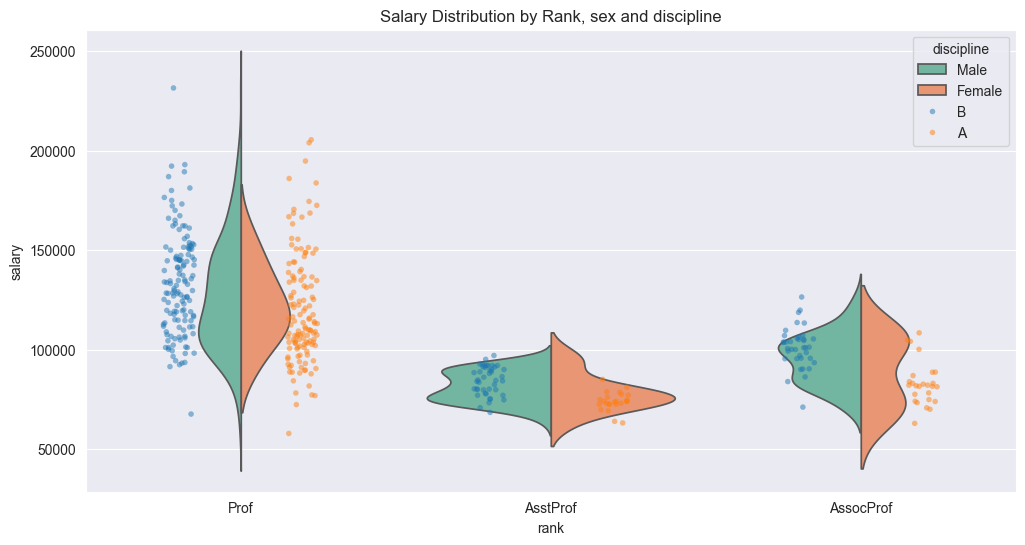

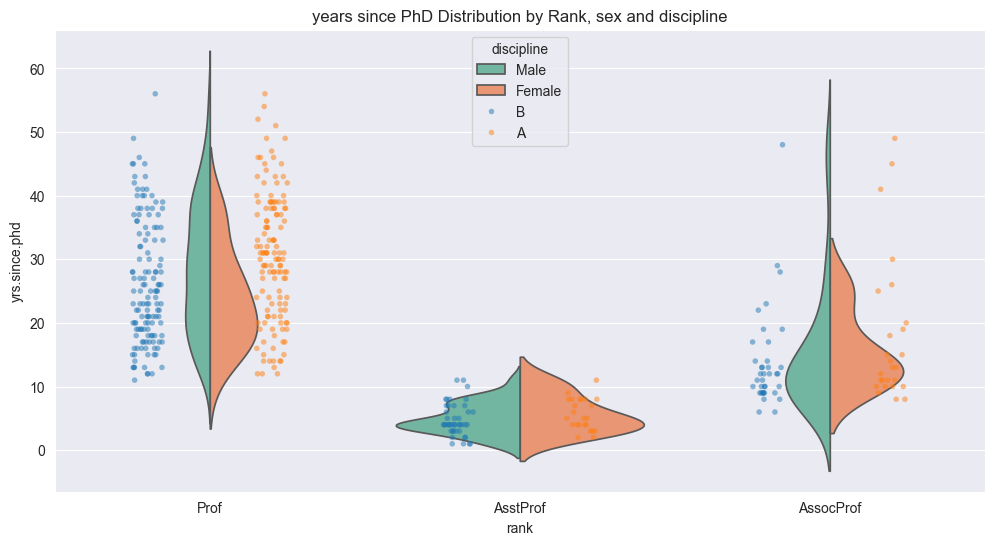

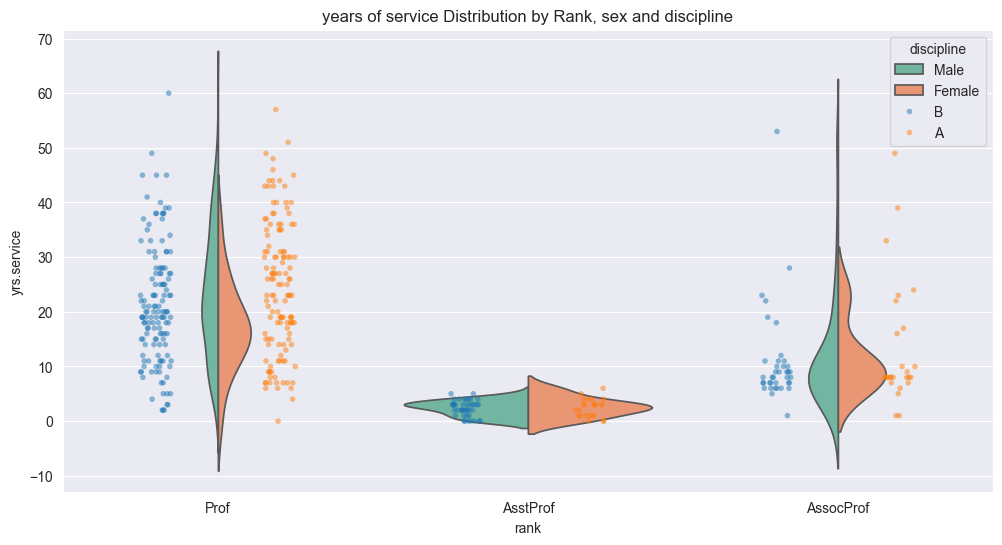

In [313]:
plt.figure(figsize=(12,6))
sns.violinplot(x='rank', y='salary', hue='sex', data=filtered_data, palette="Set2", split=True, inner=None)
sns.stripplot(x='rank', y='salary', hue='discipline', data=filtered_data, dodge=True, jitter=True, size=4, alpha=0.5)
plt.title("Salary Distribution by Rank, sex and discipline")
plt.show()

plt.figure(figsize=(12,6))
sns.violinplot(x='rank', y='yrs.since.phd', hue='sex', data=filtered_data, palette="Set2", split=True, inner=None)
sns.stripplot(x='rank', y='yrs.since.phd', hue='discipline', data=filtered_data, dodge=True, jitter=True, size=4, alpha=0.5)
plt.title("years since PhD Distribution by Rank, sex and discipline")
plt.show()

plt.figure(figsize=(12,6))
sns.violinplot(x='rank', y='yrs.service', hue='sex', data=filtered_data, palette="Set2", split=True, inner=None)
sns.stripplot(x='rank', y='yrs.service', hue='discipline', data=filtered_data, dodge=True, jitter=True, size=4, alpha=0.5)
plt.title("years of service Distribution by Rank, sex and discipline")
plt.show()

### FINAL CONCLUSIONS
based on PERMANOVA, MANOVA based on rank and post-hoc tests we can conclude that there are significant differences in salary, years since PhD and years of service based on rank, discipline and gender of faculty members. 